12/17/18
BTC Prediction

In [1]:
import requests
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1Token's API address
tokenapi = 'http://hist-quote.1tokentrade.cn'

In [6]:
# Retrieve API token
current_path = os.getcwd()
with open(current_path + '/token.txt') as file:
    ot_key = file.read().splitlines()[0]

In [ ]:
# Query all contracts for a certain date
params = {
    'date' : '2018-02-02',
}
# r = requests.get(tokenapi + '/ticks/contracts', headers = {'ot-key' : ot_key}, params = params)
# r.json()

In [ ]:
# Query a single price at date/contract
params = {
    'contract' : 'binance/btc.usdt',
    'date' : '2018-02-02',
}
# r = requests.get(tokenapi + '/ticks/simple' , headers = {'ot-key' : ot_key}, params = params)
# r

In [7]:
# Query "candlestick" data
params = {
#     'since' : '2013-12-10',
#     'since' : '2018-01-01',
    'since' : '2018-12-11',
    'until' : '2018-12-21',
    'contract' : 'binance/btc.usdt',
    'duration' : '1m',
    'format' : 'csv'
}
r = requests.get(tokenapi + '/candles' , headers = {'ot-key' : ot_key}, params = params, stream = True)

# Write to local file
df = pd.read_csv(io.StringIO(r.text))   
df.to_csv(current_path + '/btc-historical-data.csv')
print("Number of rows:", df.size / 6)
df.head()

Number of rows: 14400.0


,close,high,low,open,timestamp,volume
0,3433.40,3436.78,3432.39,3434.01,1544486400,19.362386
1,3425.85,3435.26,3424.01,3433.62,1544486460,49.151693
2,3423.26,3431.02,3423.26,3428.00,1544486520,9.487126
3,3425.19,3427.95,3423.57,3424.52,1544486580,10.325669
4,3422.83,3426.81,3422.67,3425.20,1544486640,8.280380


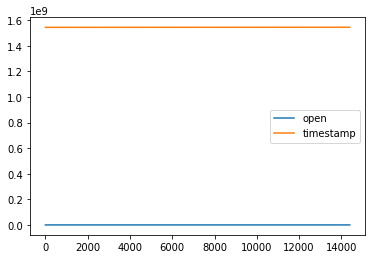

In [23]:
a = df.drop(labels=['close', 'high', 'low', 'volume'], axis=1)
a.plot()

In [21]:
a.head()

,open,timestamp
0,3434.01,1544486400
1,3433.62,1544486460
2,3428.00,1544486520
3,3424.52,1544486580
4,3425.20,1544486640


In [24]:
a.tail()

,open,timestamp
14395,4056.04,1545350100
14396,4057.83,1545350160
14397,4051.13,1545350220
14398,4052.08,1545350280
14399,4058.34,1545350340


In [29]:
(1545350340 - 1544486400) / 60 / 60 / 24

9.999305555555555

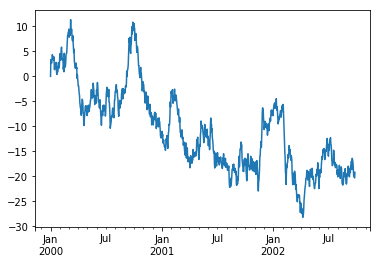

In [30]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [31]:
ts.head()

2000-01-01   -0.025469
2000-01-02    3.326182
2000-01-03    3.106494
2000-01-04    2.725452
2000-01-05    2.662038
Freq: D, dtype: float64